# Importing imitial essential libraries

In [445]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the provided datasets

In [446]:
df_train = pd.read_excel('Doctor_Train.xlsx')

In [447]:
df_test = pd.read_excel('Doctor_Test.xlsx')

In [448]:
df_sample = pd.read_excel('Doctor_Sample_submission.xlsx')

# Viewing the dataset

In [449]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


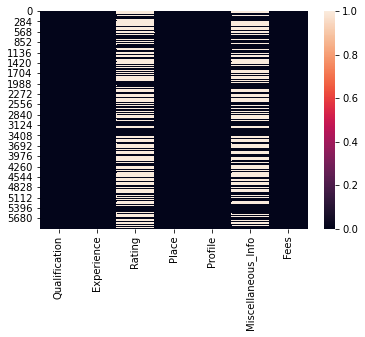

In [450]:
# Checking for null values
sns.heatmap(df_train.isnull())

In [451]:
df_train.isnull().sum()/len(df_train)*100

Qualification          0.000000
Experience             0.000000
Rating                55.393390
Place                  0.419393
Profile                0.000000
Miscellaneous_Info    43.952357
Fees                   0.000000
dtype: float64

# Lets start to treat the columns individually

# The column 'Experience' seems not ready for ML. lets treat it

In [452]:
df_train['Experience'] = df_train['Experience'].str.split()
df_train['Experience'] = df_train['Experience'].str[0].astype('int')

In [453]:
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [454]:
df_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

# Now lets treat the column 'Place'

In [455]:
df_train['Place'] = df_train['Place'].str.split(',')
df_train['City'] = df_train['Place'].str[1]
df_train['Place'] = df_train['Place'].str[0]

In [456]:
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,100%,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20,100%,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai
...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98%,Basavanagudi,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore
5957,MBBS,33,NaN,Nungambakkam,General Medicine,NaN,100,Chennai
5958,MBBS,41,97%,Greater Kailash Part 2,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi
5959,"MBBS, MD - General Medicine",15,90%,Vileparle West,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai


# Now lets treat the column 'Rating'

In [457]:
df_train['Rating'].fillna('-91%', inplace = True)

In [458]:
# View column
df_train['Rating']

0       100%
1        98%
2       -91%
3       -91%
4       100%
        ... 
5956     98%
5957    -91%
5958     97%
5959     90%
5960    100%
Name: Rating, Length: 5961, dtype: object

In [459]:
# Classifying the column in bins
pd.cut(df_train['Rating'], bins = [-99,0,10,20,30,40,50,60,70,80,90,100])

TypeError: '<' not supported between instances of 'int' and 'str'

In [460]:
# Lets first convert the entire column as type int
df_train['Rating'] = df_train['Rating'].str[:-1].astype('int')

In [461]:
# Perform operation again
df_train['Rating'] = pd.cut(df_train['Rating'], bins = [-99,0,10,20,30,40,50,60,70,80,90,100])

In [462]:
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,"(90, 100]",Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,"(90, 100]",Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,"(-99, 0]",Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,"BSc - Zoology, BAMS",12,"(-99, 0]",Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20,"(90, 100]",Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai
...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,"(90, 100]",Basavanagudi,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore
5957,MBBS,33,"(-99, 0]",Nungambakkam,General Medicine,NaN,100,Chennai
5958,MBBS,41,"(90, 100]",Greater Kailash Part 2,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi
5959,"MBBS, MD - General Medicine",15,"(80, 90]",Vileparle West,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai


In [463]:
df_train['Rating'].unique()

[(90, 100], (-99, 0], (70, 80], (80, 90], (30, 40], (50, 60], (60, 70], (40, 50], (0, 10]]
Categories (9, interval[int64]): [(-99, 0] < (0, 10] < (30, 40] < (40, 50] ... (60, 70] < (70, 80] < (80, 90] < (90, 100]]

In [464]:
df_train['Rating'].value_counts().sort_index()

(-99, 0]     3302
(0, 10]         1
(10, 20]        0
(20, 30]        0
(30, 40]        4
(40, 50]        3
(50, 60]       19
(60, 70]       32
(70, 80]       98
(80, 90]      280
(90, 100]    2222
Name: Rating, dtype: int64

# Now lets treat the column 'Qualification'

In [465]:
df_train['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [466]:
df_train['Qualification'].values

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ..., 'MBBS',
       'MBBS, MD - General Medicine', 'BDS, MDS - Orthodontics'],
      dtype=object)

In [467]:
df_train['Qualification'] = df_train['Qualification'].str.split(',')

In [468]:
df_train['Qualification'] = df_train['Qualification'].str[0]

In [469]:
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,BHMS,24,"(90, 100]",Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,BAMS,12,"(90, 100]",Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,MBBS,9,"(-99, 0]",Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,BSc - Zoology,12,"(-99, 0]",Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20,"(90, 100]",Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai
...,...,...,...,...,...,...,...,...
5956,MBBS,19,"(90, 100]",Basavanagudi,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore
5957,MBBS,33,"(-99, 0]",Nungambakkam,General Medicine,NaN,100,Chennai
5958,MBBS,41,"(90, 100]",Greater Kailash Part 2,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi
5959,MBBS,15,"(80, 90]",Vileparle West,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai


In [470]:
df_train['Qualification'].value_counts()

MBBS                                   2448
BDS                                    1208
BAMS                                    711
BHMS                                    706
MD - Dermatology                         84
                                       ... 
Masters Diploma in Acupressure            1
PDCC - Pediatric Endocrinology            1
MBA - Hospital Management                 1
Diploma in Trichology - Cosmetology       1
MSc - Endocrinology(UK)                   1
Name: Qualification, Length: 151, dtype: int64

In [471]:
df_train['Qualification'].value_counts().sort_index

<bound method Series.sort_index of MBBS                                   2448
BDS                                    1208
BAMS                                    711
BHMS                                    706
MD - Dermatology                         84
                                       ... 
Masters Diploma in Acupressure            1
PDCC - Pediatric Endocrinology            1
MBA - Hospital Management                 1
Diploma in Trichology - Cosmetology       1
MSc - Endocrinology(UK)                   1
Name: Qualification, Length: 151, dtype: int64>

In [472]:
df_train['Qualification'] = df_train['Qualification'].str.split(' ')

In [473]:
df_train['Qualification'] = df_train['Qualification'].str[0]

In [474]:
df_train['Qualification'].value_counts().sort_index

<bound method Series.sort_index of MBBS       2448
BDS        1208
BAMS        711
BHMS        706
MD          327
           ... 
FRGUHS        1
D.H.M         1
FAGE          1
DNHE          1
FFDRCSI       1
Name: Qualification, Length: 73, dtype: int64>

In [475]:
df_train['Miscellaneous_Info']

0                    100% 16 Feedback Kakkanad, Ernakulam
1                   98% 76 Feedback Whitefield, Bangalore
2                                                     NaN
3       Bannerghatta Road, Bangalore ₹250 Available on...
4                   100% 4 Feedback Keelkattalai, Chennai
                              ...                        
5956              98% 45 Feedback Basavanagudi, Bangalore
5957                                                  NaN
5958        97% 11 Feedback Greater Kailash Part 2, Delhi
5959    General Medical Consultation Viral Fever Treat...
5960    Acrylic Partial Denture Crowns and Bridges Fix...
Name: Miscellaneous_Info, Length: 5961, dtype: object

In [476]:
df_train.drop('Miscellaneous_Info', axis = 1, inplace = True)

In [477]:
df_train

,Qualification,Experience,Rating,Place,Profile,Fees,City
0,BHMS,24,"(90, 100]",Kakkanad,Homeopath,100,Ernakulam
1,BAMS,12,"(90, 100]",Whitefield,Ayurveda,350,Bangalore
2,MBBS,9,"(-99, 0]",Mathikere - BEL,ENT Specialist,300,Bangalore
3,BSc,12,"(-99, 0]",Bannerghatta Road,Ayurveda,250,Bangalore
4,BAMS,20,"(90, 100]",Keelkattalai,Ayurveda,250,Chennai
...,...,...,...,...,...,...,...
5956,MBBS,19,"(90, 100]",Basavanagudi,ENT Specialist,300,Bangalore
5957,MBBS,33,"(-99, 0]",Nungambakkam,General Medicine,100,Chennai
5958,MBBS,41,"(90, 100]",Greater Kailash Part 2,General Medicine,600,Delhi
5959,MBBS,15,"(80, 90]",Vileparle West,General Medicine,100,Mumbai


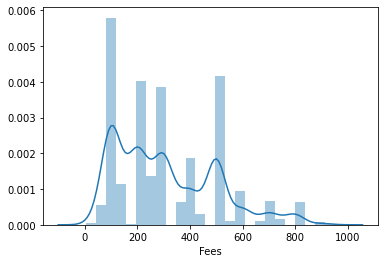

In [489]:
sns.distplot(df_train['Fees'])

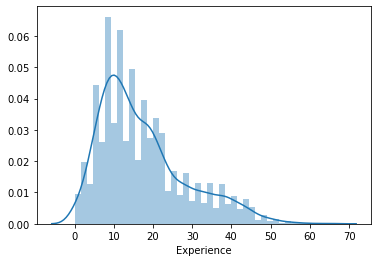

In [493]:
sns.distplot(df_train['Experience'])

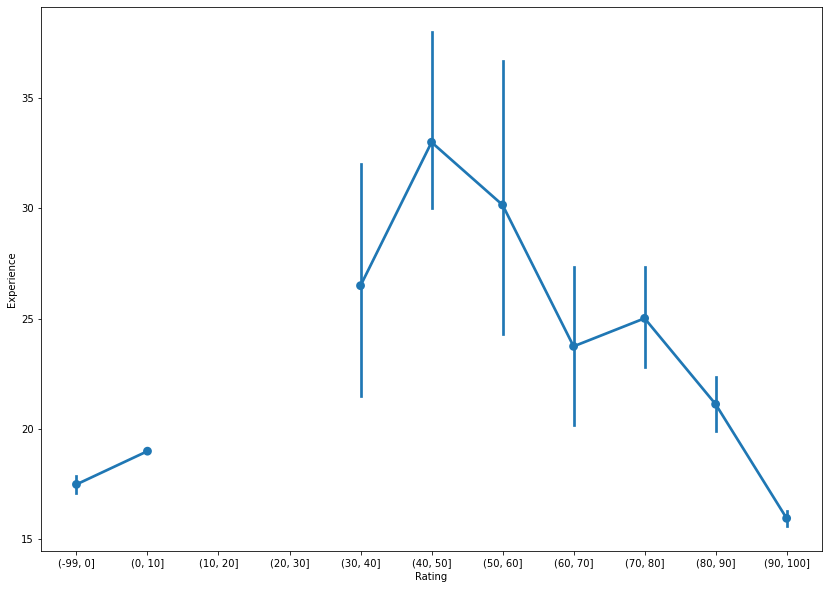

In [501]:
plt.figure(figsize = (14,10))
sns.pointplot(df_train['Rating'], df_train['Experience'])

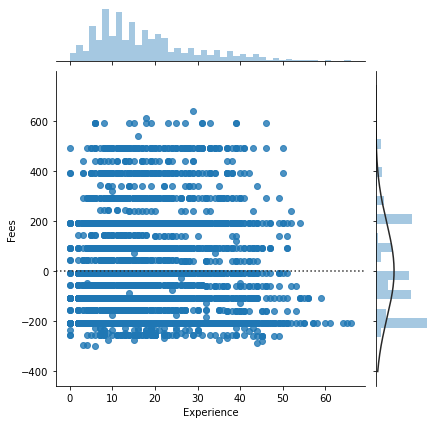

In [515]:
sns.jointplot(df_train['Experience'], df_train['Fees'], kind = "resid")
plt.show()

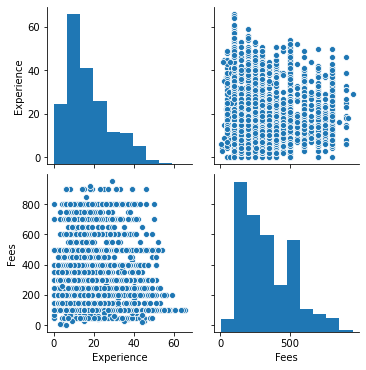

In [518]:
sns.pairplot(df_train[['Experience', 'Rating', 'Fees']])

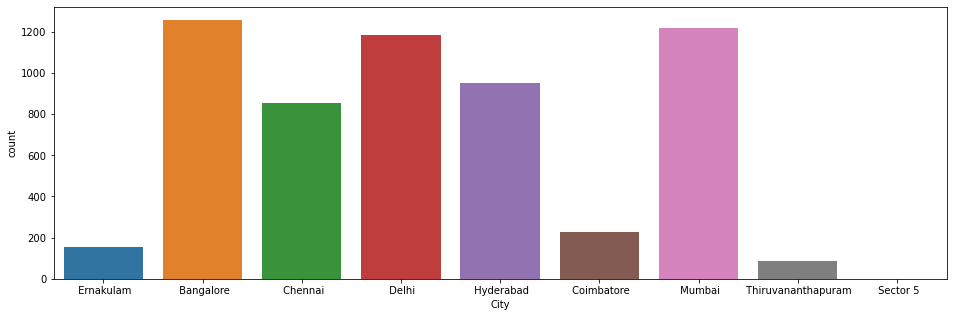

In [525]:
plt.figure(figsize = (16,5))
sns.countplot(df_train['City'])

In [520]:
df_train

,Qualification,Experience,Rating,Place,Profile,Fees,City
0,BHMS,24,"(90, 100]",Kakkanad,Homeopath,100,Ernakulam
1,BAMS,12,"(90, 100]",Whitefield,Ayurveda,350,Bangalore
2,MBBS,9,"(-99, 0]",Mathikere - BEL,ENT Specialist,300,Bangalore
3,BSc,12,"(-99, 0]",Bannerghatta Road,Ayurveda,250,Bangalore
4,BAMS,20,"(90, 100]",Keelkattalai,Ayurveda,250,Chennai
...,...,...,...,...,...,...,...
5956,MBBS,19,"(90, 100]",Basavanagudi,ENT Specialist,300,Bangalore
5957,MBBS,33,"(-99, 0]",Nungambakkam,General Medicine,100,Chennai
5958,MBBS,41,"(90, 100]",Greater Kailash Part 2,General Medicine,600,Delhi
5959,MBBS,15,"(80, 90]",Vileparle West,General Medicine,100,Mumbai


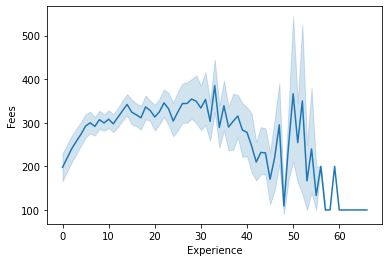

In [529]:
sns.lineplot(x = df_train['Experience'], y = df_train['Fees'])

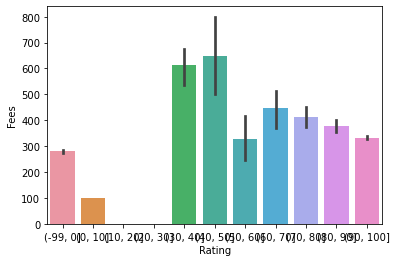

In [535]:
sns.barplot(df_train['Rating'], df_train['Fees'])

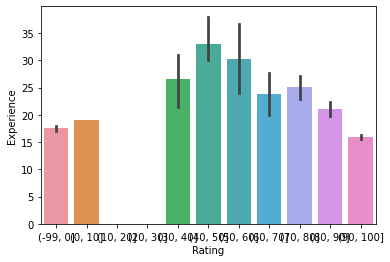

In [536]:
sns.barplot(df_train['Rating'], df_train['Experience'])

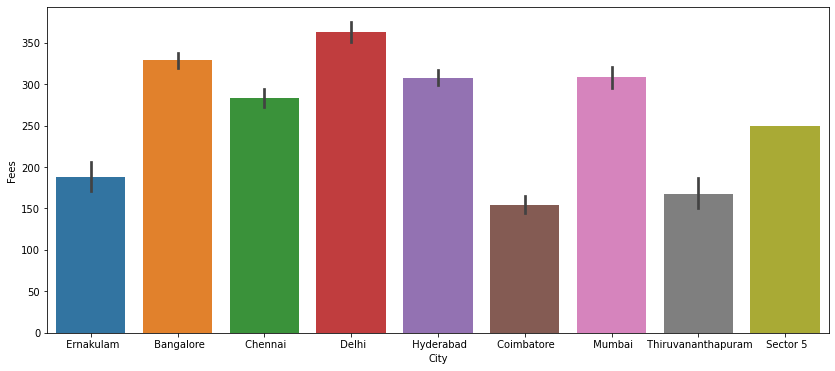

In [541]:
# Fees charged is different in all cities
plt.figure(figsize = (14,6))
sns.barplot(df_train['City'], df_train['Fees'])

# Model Building

In [585]:
x = df_train[['Qualification', 'Experience', 'Rating']]

In [586]:
y = df_train['Fees']

In [587]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

In [588]:
from sklearn.preprocessing import LabelEncoder
lb_encode = LabelEncoder()

In [589]:
df_train['Qualification'] = lb_encode.fit_transform(df_train['Qualification'])
df_train['Experience'] = lb_encode.fit_transform(df_train['Experience'])
df_train['Rating'] = lb_encode.fit_transform(df_train['Rating'])

In [590]:
x.columns

Index(['Qualification', 'Experience', 'Rating'], dtype='object')

,Qualification,Experience,Rating
0,8,23,8
1,5,11,8
2,50,8,0
3,11,11,0
4,5,19,8
...,...,...,...
5956,50,18,8
5957,50,32,0
5958,50,40,8
5959,50,14,7


In [593]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [594]:
# feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [595]:
# support vector machine 
from sklearn.svm import SVR
m = SVR(gamma="scale")
m.fit(scaler.transform(x_train),y_train)

SVR()

In [597]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2
# Prediction
y_pred = m.predict(scaler.transform(x_test))
score(y_pred,y_test)

0.7728243196729507

# End of EDA